[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/jupyter/blob/main/notebooks/notebook.ipynb)
[![Render nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/jupyter/blob/main/notebooks/notebook.ipynb)

In [1]:
%matplotlib inline

import ipywidgets as widgets
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from yellowbrick.model_selection import FeatureImportances


In [2]:
iris = load_iris()
X, y, feature_names, target_names = (
    iris.data,
    iris.target,
    iris.feature_names,
    iris.target_names,
)
df = pd.DataFrame(X, columns=feature_names)
df["species"] = pd.Categorical.from_codes(y, target_names)


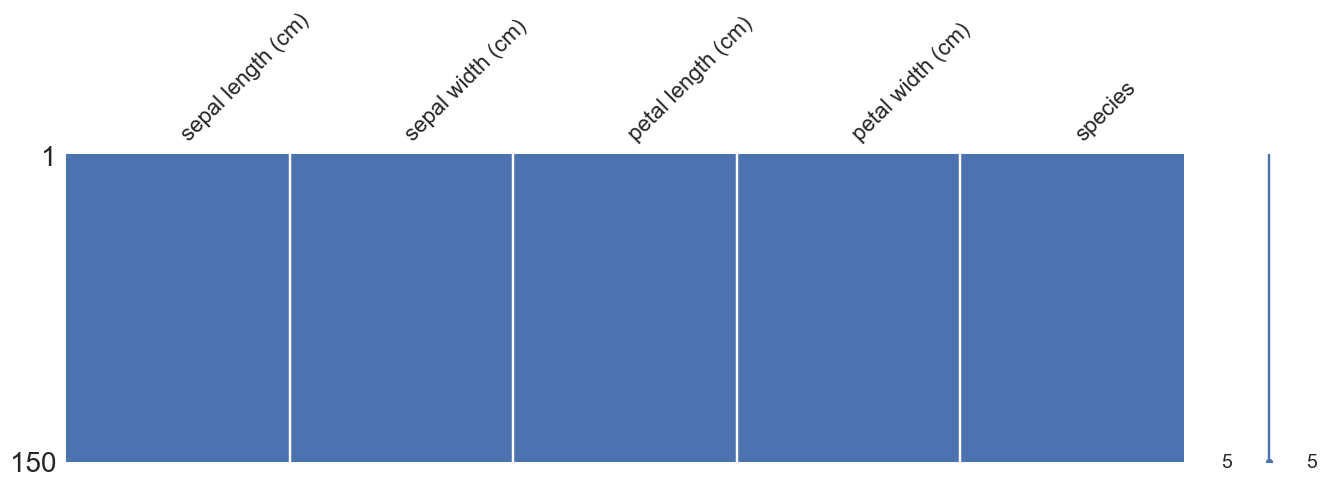

In [3]:
palette = sns.color_palette("deep", len(target_names))
color = dict(zip(target_names, palette))
msno.matrix(df, color=color["setosa"], figsize=(16, 4))  # no missing in iris
plt.show()


In [ ]:
fig = px.scatter_matrix(df, dimensions=feature_names, color="species")
fig.update_layout(width=800, height=700)
fig.update_traces(diagonal_visible=False)
fig.show()


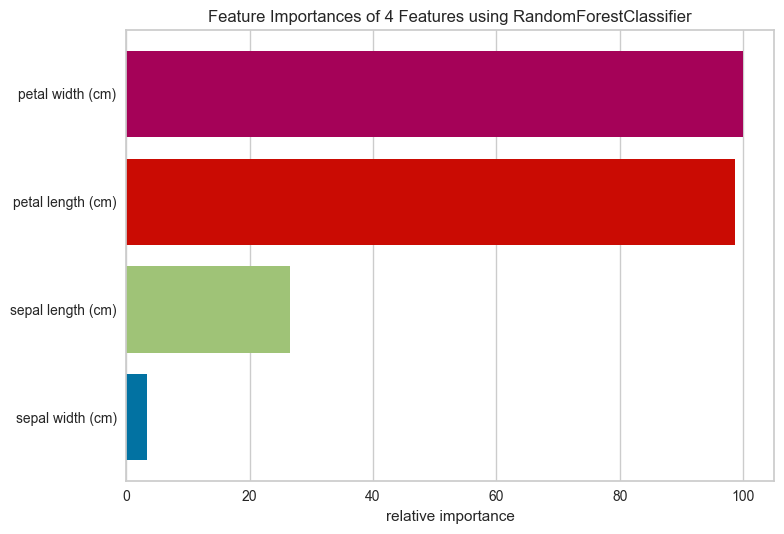

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# plot feature importances
viz = FeatureImportances(model, labels=iris.feature_names)
viz.fit(X_train, y_train)
viz.show()
plt.show()


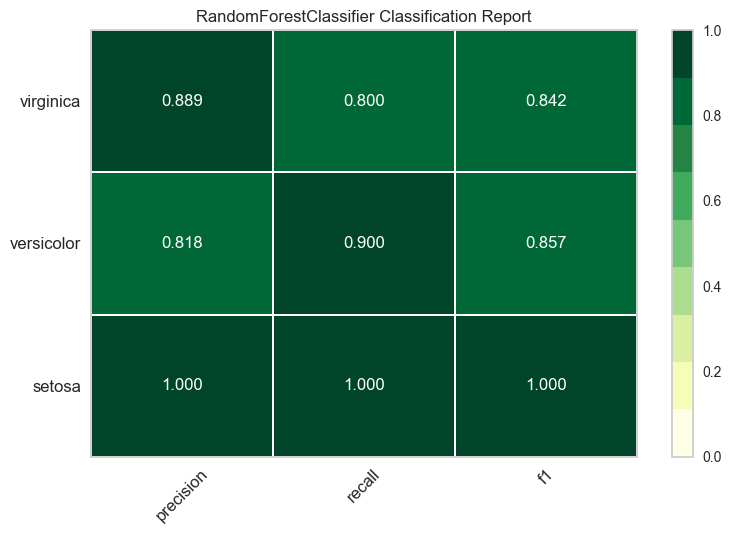

In [5]:
viz = ClassificationReport(model, classes=iris.target_names, cmap="YlGn")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()


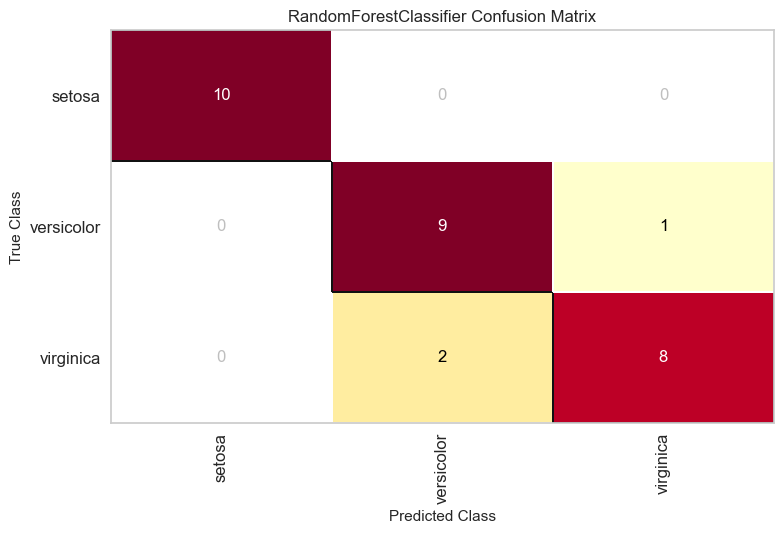

In [6]:
viz = ConfusionMatrix(model, classes=iris.target_names)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()


In [ ]:
# input field widgets
sepal_length = widgets.FloatText(value=6.0, description=feature_names[0])
sepal_width = widgets.FloatText(value=3.0, description=feature_names[1])
petal_length = widgets.FloatText(value=4.0, description=feature_names[2])
petal_width = widgets.FloatText(value=1.5, description=feature_names[3])

# predict button
predict_btn = widgets.Button(description="Predict")

# display output
output = widgets.Output()


# button click handler
def handle_click(b):
    data = [sepal_length.value, sepal_width.value, petal_length.value, petal_width.value]
    prediction = model.predict([data])
    species = iris.target_names[prediction][0]

    with output:
        output.clear_output()
        print(f"Species: {species}")


predict_btn.on_click(handle_click)

display(
    sepal_length,
    sepal_width,
    petal_length,
    petal_width,
    predict_btn,
    output,
)
